In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
# import the data
df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

In [5]:
df_08.shape , df_18.shape

((2404, 18), (1611, 18))

Two dataset contains 2404 and 1611 data points respectively. Both have 18 features describing each data point.

In [6]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [7]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## Data Cleaning

#### 1. Removing duplicates
#### 2. Removing NA data
#### 3. Fixing Data Types
#### 4. Remove unnnecessary features
#### 5.  Change column names
#### 6. Extract data from only CA region. For consistency, only compare cars certified by California standards.



In [8]:
# duplicates in 2008 dataset 
df_08.duplicated().sum()

25

In [9]:
# null value of 2008 dataset 
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [10]:
# data type of 2008 dataset 
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [11]:
# check unique numbers for each column in 2008 dataset
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [12]:
# check duplicates in 2018 dataset
df_18.duplicated().sum()

0

In [13]:
# check null values in 2018 dataset
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [14]:
# data types of 2018 dataset
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [15]:
# check unique numbers for each column in 2018 dataset
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [16]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [17]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [18]:
# rename Sales Area to Cert Region
df_08.rename(columns = {"Sales Area":"Cert Region"}, inplace=True)
# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [19]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [20]:
df_18.rename(columns = lambda x: x.strip().lower().replace(" ","_"),inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [21]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [22]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [23]:
# save new datasets for next section
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)

In [24]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region=="CA"')
df_18 = df_18.query('cert_region=="CA"')

#### Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

In [25]:
df_08['cert_region'].head(),  df_18['cert_region'].head()

(0    CA
 2    CA
 4    CA
 6    CA
 7    CA
 Name: cert_region, dtype: object,
 1    CA
 3    CA
 4    CA
 6    CA
 8    CA
 Name: cert_region, dtype: object)

In [26]:
# confirm only certification region is California
df_08['cert_region'].unique() , df_18['cert_region'].unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [27]:
# drop certification region columns form both datasets
df_08.drop(['cert_region'], axis=1, inplace=True)
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [28]:
df_18.drop(['cert_region'], axis=1, inplace=True)
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [29]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True) # here must have inplace=True
df_18.dropna(inplace=True)

In [30]:
# checks if any of columns in datasets have null values - should print False
df_08.isnull().sum().any()  , df_18.isnull().sum().any()

(False, False)

In [31]:
df_08.drop_duplicates(inplace=True) # here must have inplace=True
df_18.drop_duplicates(inplace=True)

df_18.duplicated().sum(), df_08.duplicated().sum()

(0, 0)

In [32]:
# save progress for the next section
df_08.to_csv('data_08_v2.csv', index=False)
df_18.to_csv('data_18_v2.csv', index=False)

In [33]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [34]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(np.int64)
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [35]:
# convert 2018 cyl column from float to int
df_18['cyl'] = df_18['cyl'].astype(int)
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [36]:
df_08.to_csv('data_08_v3.csv', index=False)
df_18.to_csv('data_18_v3.csv', index=False)

#### Fix cyl datatype 2008: extract int from string. 2018: convert float to int.
#### Fix air_pollution_score datatype 2008: convert string to float. 2018: convert int to float.
#### Fix city_mpg, hwy_mpg, cmb_mpg datatypes 2008 and 2018: convert string to float.
#### Fix greenhouse_gas_score datatype 2008: convert from float to int.

In [37]:
# data types of 2018 dataset
df_18.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [38]:
df_08.iloc[582]    # note some fraction formed string would be hard to convert to float directly

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1550, dtype: object

#### All vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. Meaning, we need to make new data points for hybrid vehicles for each configuration.

In [39]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [40]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


#### Take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Separate them with two dataframes!

In [41]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [42]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [43]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [44]:

# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values after the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [45]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [46]:
hb_08.index

Int64Index([1550], dtype='int64')

In [47]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [48]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [49]:

df_08.shape

(987, 13)

In [50]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()
#  df1

In [51]:
# apply split function to each column of each dataframe copy

# list of columns to split
split_columns = ['fuel','city_mpg', 'hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
# df1  no more /
# df2

In [52]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True) # drop original one 

# append new_rows to df_18  
df_18 = df_18.append(new_rows,ignore_index=True)

In [53]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [54]:
df_18.shape, df_08.shape

((832, 13), (987, 13))

In [55]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype('float64')

# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype('float64')

In [56]:
# data types of 2018 dataset
df_18.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int32
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [57]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

In [58]:
df_08 = pd.read_csv('data_08_v4.csv')
df_18 = pd.read_csv('data_18_v4.csv')
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                  int64
hwy_mpg                   int64
cmb_mpg                   int64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [59]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

In [60]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [61]:
# convert from float to int64
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(np.int64)

In [62]:
# All the dataypes are now fixed! Take one last check to confirm all the changes.
df_08.dtypes, df_18.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [63]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

## Data Visualisation

In [64]:
# Save your final CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

In [65]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [66]:
df_08.shape, df_18.shape

((987, 13), (832, 13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0E6961688>,
      dtype=object)

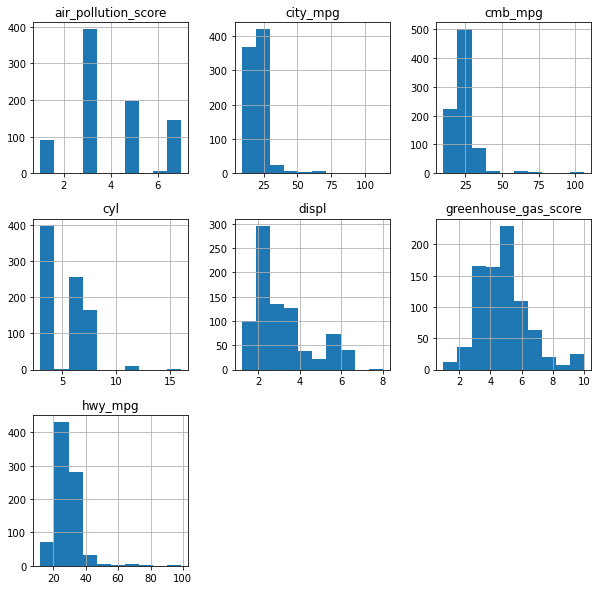

In [67]:
df_18.hist(figsize=(10,10))

Throught the plot, we can see from 2008 to 2018, combined_mpg becomes more skewed to the right.
Also, the distributions of greenhouse gas score turns to be more skewed to left.
These plots indicate a general improvement in the fuel effeciency performance over the years.

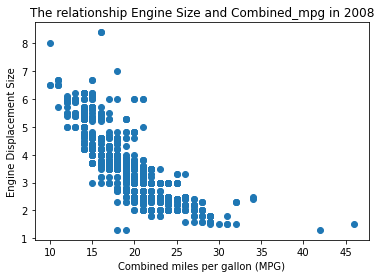

In [71]:
plt.scatter(data = df_08 , x='cmb_mpg' , y = 'displ') ;
plt.title('The relationship Engine Size and Combined_mpg in 2008')
plt.xlabel('Combined miles per gallon (MPG)')
plt.ylabel('Engine Displacement Size')
plt.show()

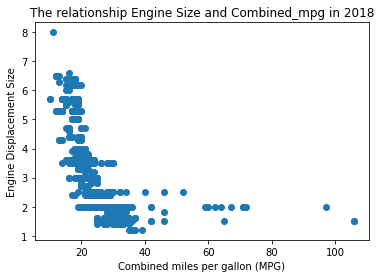

In [72]:
plt.scatter(data = df_18 , x='cmb_mpg' , y = 'displ')
plt.title('The relationship Engine Size and Combined_mpg in 2018')
plt.xlabel('Combined miles per gallon (MPG)')
plt.ylabel('Engine Displacement Size')
plt.show()

There is a visible negative coorelation between displacement and combined mpg irrespective of the year. This indicates that smaller engines in general are more fuel effecient than the larger engines with more displacement.

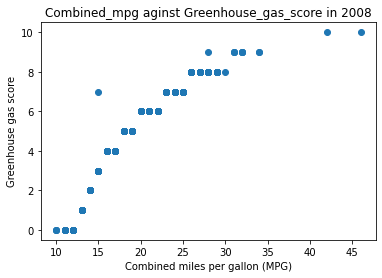

In [75]:
plt.scatter( data = df_08 , x='cmb_mpg' , y = 'greenhouse_gas_score') ;
plt.title('Combined_mpg aginst Greenhouse_gas_score in 2008')
plt.xlabel('Combined miles per gallon (MPG)')
plt.ylabel('Greenhouse gas score')
plt.show()

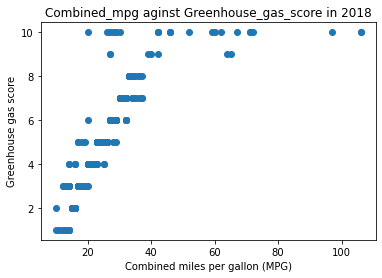

In [76]:
plt.scatter( data = df_18 , x='cmb_mpg' , y = 'greenhouse_gas_score') ;
plt.title('Combined_mpg aginst Greenhouse_gas_score in 2018')
plt.xlabel('Combined miles per gallon (MPG)')
plt.ylabel('Greenhouse gas score')
plt.show()

From the above graph, there is a strong positive correlation between greenhouse gas score and combined mpg. This makes sense because higher fuel efficiency corresponds better cars having less greenhouse gas emissions. Hence a fuel efficient car is also more environmentally friendly in the sense that it produces lesser greenhouse gases.

### Data Analysis

#### From the cleaned data we now proceed to extract interesting information. We compare the car performance metrics from 2008 and 2018 and comment on the various changes in fuel performance over the years.

#### For our data analysis we attempt to answer the following questions

##### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much? 
##### Q2: How much have vehicle classes improved in fuel economy (increased in mpg)? 
##### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas) 
##### Q4: What features are associated with better fuel economy (mpg)? 
##### Q5:For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [77]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [78]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [79]:
df_08["fuel"].unique(), df_18["fuel"].unique()

(array(['Gasoline', 'CNG', 'ethanol', 'gas'], dtype=object),
 array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'],
       dtype=object))

We can see that 2008 models uses CNG and ethanol as alternative fuel sources and 2018 models use ethanol and electricity

In [80]:
# q1: what are the alternative sources?  CNG and Ethanol and Electricity are all altenative sources
df_08['fuel'].value_counts()  # CNG and Ethanol

Gasoline    984
CNG           1
gas           1
ethanol       1
Name: fuel, dtype: int64

In [81]:
df_18['fuel'].value_counts() 

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [83]:
# unique models used alternative sources of fuel in 2008 and 2018
al_08 = df_08.query('fuel in ["CNG","ethanol"]').model.nunique()
al_18 = df_18.query('fuel in ["Electricity","Ethanol"]').model.nunique() 

In [84]:
al_08, al_18

(2, 26)

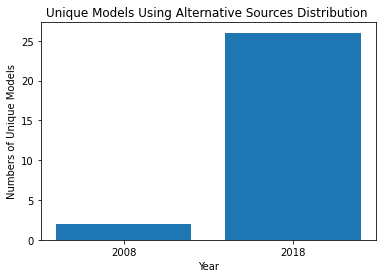

In [85]:
plt.bar(['2008','2018'],[al_08 , al_18] )
plt.title('Unique Models Using Alternative Sources Distribution ')
plt.xlabel('Year')
plt.ylabel('Numbers of Unique Models');

#### From the above plot we can see that the number of models adopting alternative fuel has increased in 2018 as compared to 2008

In [86]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [87]:
prop_08 = al_08/total_08
prop_18 = al_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

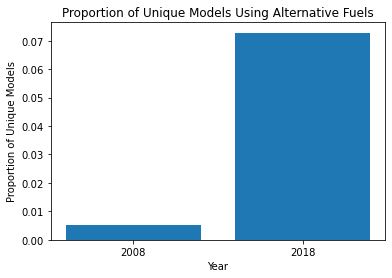

In [88]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

#### More unique models using alternative sources of fuel in 2018 compared to 2008 , increased by 6.75%

### Q2: How much have vehicle classes improved in fuel economy?

#### Grouping by veh_class and comparing the combined miles per gallon mean

In [89]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [90]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [91]:
df_08['veh_class'].unique(), df_18['veh_class'].unique()

(array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
        'minivan', 'van', 'pickup'], dtype=object),
 array(['small SUV', 'small car', 'midsize car', 'large car',
        'standard SUV', 'station wagon', 'pickup', 'special purpose',
        'minivan'], dtype=object))

In [93]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

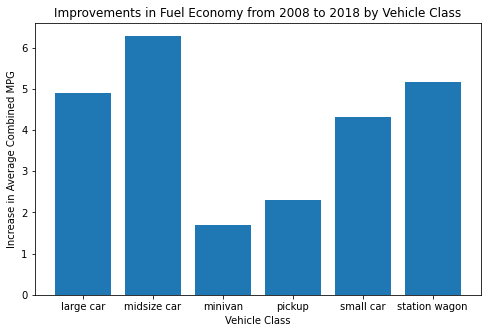

In [94]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

#### In general we can see a trend that the different class of vehicles shows improvement in the combined miles per gallon performance

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

#### Extracting SmartWay vehicles

In [95]:
df_08["smartway"].unique()

array(['no', 'yes'], dtype=object)

In [96]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [97]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [98]:
df_18["smartway"].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [99]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [100]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

#### Explore trends between cmb_mpg and the other features in this dataset for all vehicles that have the better than average fuel efficiency

In [101]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [102]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [103]:
df_08 = pd.read_csv("clean_08.csv")
df_18 = pd.read_csv("clean_18.csv")

### Merging the two datasets. (Inner Join)

In [104]:
# Merge datasets
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10]+"_2008", inplace=True)
# merge datasets
df_combined = pd.merge(df_08,df_18,left_on='model_2008', right_on='model', how='inner')

In [105]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [107]:
#Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model 
#To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
# get two columns' mean at the same time 
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


Create a new column, mpg_change, with the change in mpg . Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [108]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


#### From the above table we can see the models and the corresponding improvements in the miles per gallon.

#### We can also get the vehicle which has the max  change in MPG from 2008 to 2018.

In [109]:
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [110]:
model_mpg[model_mpg['mpg_change'] == max_change].index[0]

'VOLVO XC 90'